# HISTORY

### Context
* This dataset contains 4242 images of flowers.
* The data collection is based on the data flicr, google images, yandex images.
* You can use this dataset to recognize plants from the photo.

### Content
* The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
* For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. Photos are not reduced to a single size, they have different proportions

# PACKAGES AND LIBRARIES

In [245]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.optimizers import RMSprop,Adam
import glob
from PIL import Image
from sklearn.preprocessing import StandardScaler
from keras.preprocessing import image
from keras.layers import SimpleRNN
from keras.layers import LSTM

#### IGNORING WARNINGS

In [2]:
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# PATH & DATA PROCESS

#### PATH

In [3]:
Flowers_All_Path = Path("../input/flowers-recognition/flowers")

In [4]:
Flowers_JPG_Path = list(Flowers_All_Path.glob(r"*/*.jpg"))

#### LABEL

In [5]:
Flowers_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Flowers_JPG_Path))

#### TRANSFORMATION SERIES 

In [6]:
JPG_Path_Series = pd.Series(Flowers_JPG_Path,name="JPG").astype(str)

In [7]:
JPG_Labels_Series = pd.Series(Flowers_JPG_Labels,name="CATEGORY")

In [8]:
print(JPG_Path_Series.head(-1))

0       ../input/flowers-recognition/flowers/dandelion...
1       ../input/flowers-recognition/flowers/dandelion...
2       ../input/flowers-recognition/flowers/dandelion...
3       ../input/flowers-recognition/flowers/dandelion...
4       ../input/flowers-recognition/flowers/dandelion...
                              ...                        
4317    ../input/flowers-recognition/flowers/rose/5001...
4318    ../input/flowers-recognition/flowers/rose/7820...
4319    ../input/flowers-recognition/flowers/rose/5148...
4320    ../input/flowers-recognition/flowers/rose/5335...
4321    ../input/flowers-recognition/flowers/rose/8063...
Name: JPG, Length: 4322, dtype: object


In [9]:
print(JPG_Labels_Series.head(-1))

0       dandelion
1       dandelion
2       dandelion
3       dandelion
4       dandelion
          ...    
4317         rose
4318         rose
4319         rose
4320         rose
4321         rose
Name: CATEGORY, Length: 4322, dtype: object


#### TRANSFORMATION DATAFRAME

In [10]:
Main_Data = pd.concat([JPG_Path_Series,JPG_Labels_Series],axis=1)

In [11]:
print(Main_Data.head(-1))

                                                    JPG   CATEGORY
0     ../input/flowers-recognition/flowers/dandelion...  dandelion
1     ../input/flowers-recognition/flowers/dandelion...  dandelion
2     ../input/flowers-recognition/flowers/dandelion...  dandelion
3     ../input/flowers-recognition/flowers/dandelion...  dandelion
4     ../input/flowers-recognition/flowers/dandelion...  dandelion
...                                                 ...        ...
4317  ../input/flowers-recognition/flowers/rose/5001...       rose
4318  ../input/flowers-recognition/flowers/rose/7820...       rose
4319  ../input/flowers-recognition/flowers/rose/5148...       rose
4320  ../input/flowers-recognition/flowers/rose/5335...       rose
4321  ../input/flowers-recognition/flowers/rose/8063...       rose

[4322 rows x 2 columns]


In [12]:
print(Main_Data["JPG"][1])
print(Main_Data["CATEGORY"][1])
print(Main_Data["JPG"][1398])
print(Main_Data["CATEGORY"][1398])
print(Main_Data["JPG"][355])
print(Main_Data["CATEGORY"][355])
print(Main_Data["JPG"][710])
print(Main_Data["CATEGORY"][710])
print(Main_Data["JPG"][1001])
print(Main_Data["CATEGORY"][1001])
print(Main_Data["JPG"][1501])
print(Main_Data["CATEGORY"][1501])
print(Main_Data["JPG"][2033])
print(Main_Data["CATEGORY"][2033])

../input/flowers-recognition/flowers/dandelion/2625836599_03e192266f.jpg
dandelion
../input/flowers-recognition/flowers/daisy/3625257860_33efeef614_m.jpg
daisy
../input/flowers-recognition/flowers/dandelion/14576445793_582aa6446b_m.jpg
dandelion
../input/flowers-recognition/flowers/dandelion/33522989504_542fde1a1a_n.jpg
dandelion
../input/flowers-recognition/flowers/dandelion/34234226791_63a2afc7ed_n.jpg
dandelion
../input/flowers-recognition/flowers/daisy/33880234094_2541c9c83d_n.jpg
daisy
../input/flowers-recognition/flowers/sunflower/8234846550_fdaf326dbe.jpg
sunflower


#### SHUFFLING

In [13]:
Main_Data = Main_Data.sample(frac=1).reset_index(drop=True)

In [14]:
print(Main_Data.head(-1))

                                                    JPG   CATEGORY
0     ../input/flowers-recognition/flowers/daisy/992...      daisy
1     ../input/flowers-recognition/flowers/rose/5001...       rose
2     ../input/flowers-recognition/flowers/tulip/166...      tulip
3     ../input/flowers-recognition/flowers/tulip/904...      tulip
4     ../input/flowers-recognition/flowers/rose/5055...       rose
...                                                 ...        ...
4317  ../input/flowers-recognition/flowers/rose/1497...       rose
4318  ../input/flowers-recognition/flowers/rose/2232...       rose
4319  ../input/flowers-recognition/flowers/daisy/338...      daisy
4320  ../input/flowers-recognition/flowers/dandelion...  dandelion
4321  ../input/flowers-recognition/flowers/daisy/145...      daisy

[4322 rows x 2 columns]


# VISUALIZATION

#### GENERAL

In [15]:
plt.style.use('dark_background')

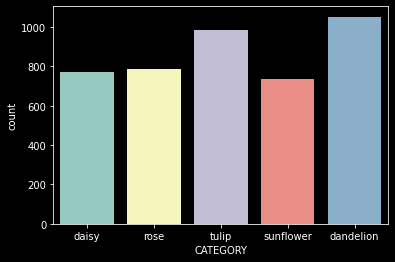

In [16]:
sns.countplot(Main_Data["CATEGORY"])
plt.show()

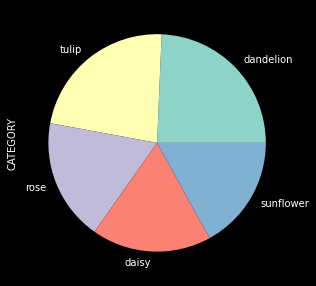

In [17]:
Main_Data['CATEGORY'].value_counts().plot.pie(figsize=(5,5))
plt.show()

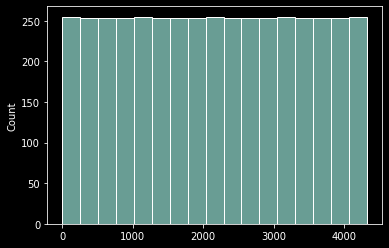

In [18]:
sns.histplot(Main_Data['CATEGORY'].index)
plt.show()

#### IMAGE

Text(0.5, 1.0, 'daisy')

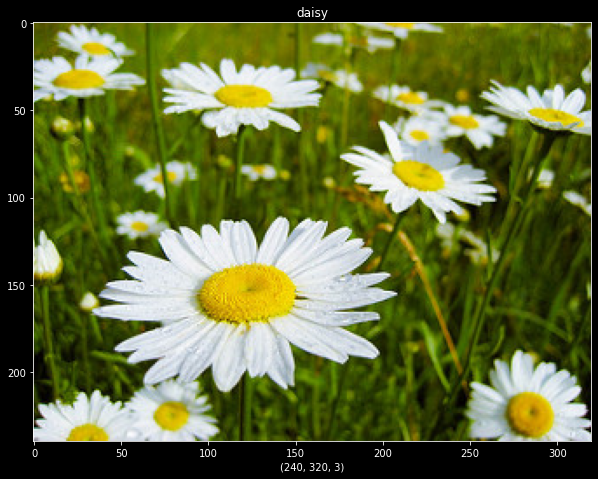

In [19]:
figure = plt.figure(figsize=(10,10))
x = plt.imread(Main_Data["JPG"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Data["CATEGORY"][0])

Text(0.5, 1.0, 'tulip')

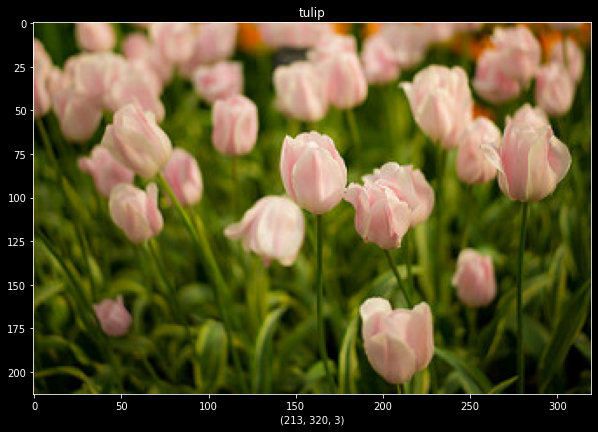

In [20]:
figure = plt.figure(figsize=(10,10))
x = plt.imread(Main_Data["JPG"][20])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Data["CATEGORY"][20])

Text(0.5, 1.0, 'tulip')

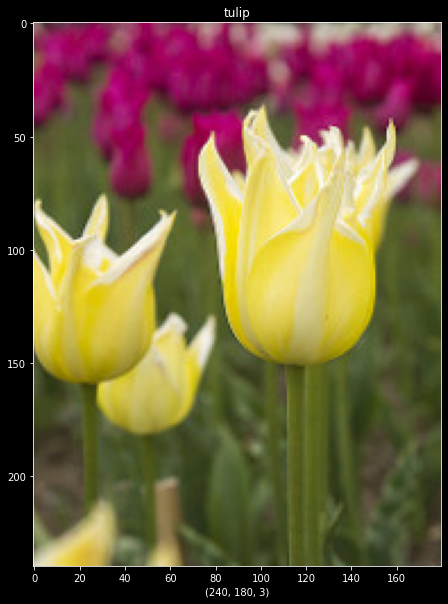

In [21]:
figure = plt.figure(figsize=(10,10))
x = plt.imread(Main_Data["JPG"][4001])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Data["CATEGORY"][4001])

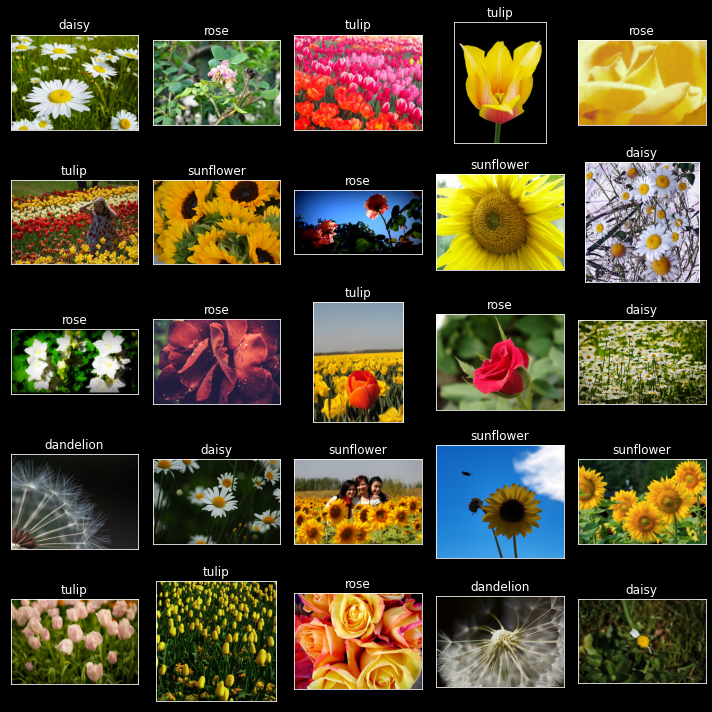

In [22]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data["JPG"][i]))
    ax.set_title(Main_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

# DETERMINATION TRAIN AND TEST DATA

In [126]:
Train_Data,Test_Data = train_test_split(Main_Data,train_size=0.9,random_state=123,shuffle=True)

In [127]:
print("TRAIN SHAPE: ",Train_Data.shape)
print("TEST SHAPE: ",Test_Data.shape)

TRAIN SHAPE:  (3890, 2)
TEST SHAPE:  (433, 2)


In [128]:
print(Train_Data.head(-1))
print("----"*20)
print(Test_Data.head(-1))

                                                    JPG   CATEGORY
4194  ../input/flowers-recognition/flowers/dandelion...  dandelion
1186  ../input/flowers-recognition/flowers/sunflower...  sunflower
835   ../input/flowers-recognition/flowers/dandelion...  dandelion
4069  ../input/flowers-recognition/flowers/daisy/160...      daisy
1411  ../input/flowers-recognition/flowers/tulip/693...      tulip
...                                                 ...        ...
96    ../input/flowers-recognition/flowers/dandelion...  dandelion
1593  ../input/flowers-recognition/flowers/tulip/161...      tulip
4060  ../input/flowers-recognition/flowers/tulip/112...      tulip
1346  ../input/flowers-recognition/flowers/sunflower...  sunflower
3454  ../input/flowers-recognition/flowers/daisy/135...      daisy

[3889 rows x 2 columns]
--------------------------------------------------------------------------------
                                                    JPG   CATEGORY
2175  ../input/flowers-

# IMAGE GENERATOR

In [129]:
Train_Generator = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.1,
                                    zoom_range=0.2,
                                    rotation_range=40,
                                    shear_range=0.2,
                                     channel_shift_range=0.2,
                                     fill_mode="nearest",
                                    horizontal_flip=True)

In [130]:
Test_Generator = ImageDataGenerator(rescale=1./255)

#### How Generator Applied Image Look Like

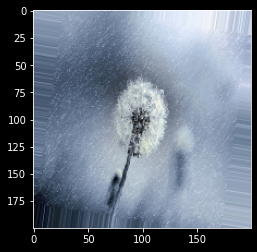

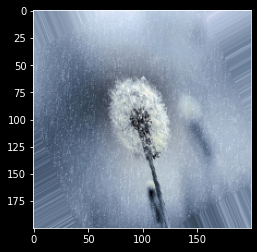

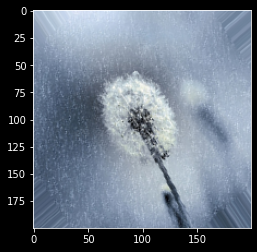

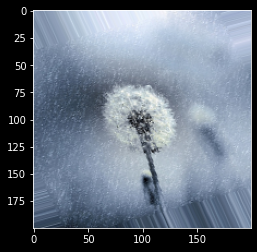

In [131]:
example_IMG = Train_Data["JPG"][96]
Load_IMG = image.load_img(example_IMG,target_size=(200,200))
Array_IMG = image.img_to_array(Load_IMG)
Array_IMG = Array_IMG.reshape((1,) + Array_IMG.shape)

i = 0
for batch in Train_Generator.flow(Array_IMG,batch_size=1):
    plt.figure(i)
    plot_IMG = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

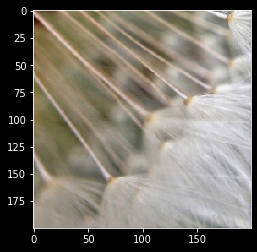

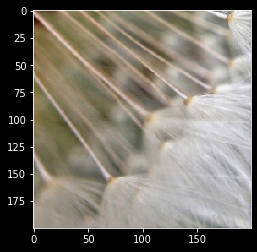

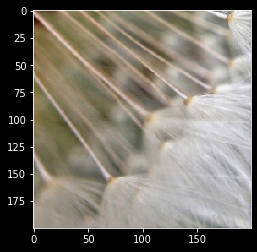

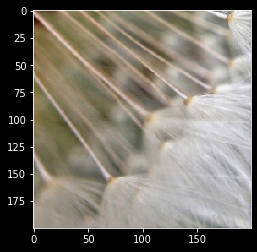

In [132]:
example_IMG = Test_Data["JPG"][909]
Load_IMG = image.load_img(example_IMG,target_size=(200,200))
Array_IMG = image.img_to_array(Load_IMG)
Array_IMG = Array_IMG.reshape((1,) + Array_IMG.shape)

i = 0
for batch in Test_Generator.flow(Array_IMG,batch_size=1):
    plt.figure(i)
    plot_IMG = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

#### APPLYING GENERATOR AND TRANSFORMATION TO TENSOR

In [133]:
Train_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Train_Data,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                    subset="training",
                                                   batch_size=32,
                                                   target_size=(200,200))

Found 3501 validated image filenames belonging to 5 classes.


In [134]:
Validation_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Train_Data,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                    subset="validation",
                                                   batch_size=32,
                                                   target_size=(200,200))

Found 389 validated image filenames belonging to 5 classes.


In [135]:
Test_IMG_Set = Test_Generator.flow_from_dataframe(dataframe=Test_Data,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                   batch_size=32,
                                                   target_size=(200,200))

Found 433 validated image filenames belonging to 5 classes.


In [136]:
for data_batch,label_batch in Train_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 200, 200, 3)
LABEL SHAPE:  (32, 5)


In [137]:
for data_batch,label_batch in Validation_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 200, 200, 3)
LABEL SHAPE:  (32, 5)


In [138]:
for data_batch,label_batch in Test_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 200, 200, 3)
LABEL SHAPE:  (32, 5)


In [139]:
print("TRAIN: ")
print(Train_IMG_Set.class_indices)
print(Train_IMG_Set.classes[0:5])
print(Train_IMG_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validation_IMG_Set.class_indices)
print(Validation_IMG_Set.classes[0:5])
print(Validation_IMG_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_IMG_Set.class_indices)
print(Test_IMG_Set.classes[0:5])
print(Test_IMG_Set.image_shape)
print("---"*20)

TRAIN: 
{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
[2, 4, 3, 1, 4]
(200, 200, 3)
------------------------------------------------------------
VALIDATION: 
{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
[1, 3, 1, 0, 4]
(200, 200, 3)
------------------------------------------------------------
TEST: 
{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
[4, 4, 2, 1, 2]
(200, 200, 3)
------------------------------------------------------------


# CNN / Convolutional Neural Network

#### STRUCTURE

In [140]:
Model = Sequential()

Model.add(Conv2D(12,(3,3),activation="relu",
                 input_shape=(200,200,3)))
Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(24,(3,3),
                 activation="relu",padding="same"))
Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(64,(3,3),
                 activation="relu",padding="same"))
Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(128,(2,2),
                 activation="relu",padding="same"))
Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(256,(2,2),
                 activation="relu",padding="same"))
Model.add(MaxPooling2D((2,2)))

#
Model.add(Flatten())
Model.add(Dense(512,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(5,activation="softmax"))

#### COMPILE

In [141]:
Model.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

#### FITTING

In [142]:
ANN_Model = Model.fit(Train_IMG_Set,
                      validation_data=Validation_IMG_Set,
                      epochs=50)

Epoch 1/50
110/110 [==============================] - 45s 401ms/step - loss: 1.6106 - accuracy: 0.3272 - val_loss: 1.1597 - val_accuracy: 0.5116
Epoch 2/50
110/110 [==============================] - 44s 401ms/step - loss: 1.1227 - accuracy: 0.5505 - val_loss: 1.0953 - val_accuracy: 0.5835
Epoch 3/50
110/110 [==============================] - 44s 403ms/step - loss: 1.0011 - accuracy: 0.6126 - val_loss: 1.0516 - val_accuracy: 0.5733
Epoch 4/50
110/110 [==============================] - 44s 400ms/step - loss: 0.9596 - accuracy: 0.6180 - val_loss: 1.1194 - val_accuracy: 0.5733
Epoch 5/50
110/110 [==============================] - 44s 404ms/step - loss: 0.8740 - accuracy: 0.6625 - val_loss: 0.9352 - val_accuracy: 0.5938
Epoch 6/50
110/110 [==============================] - 44s 399ms/step - loss: 0.8600 - accuracy: 0.6727 - val_loss: 0.8669 - val_accuracy: 0.6684
Epoch 7/50
110/110 [==============================] - 44s 399ms/step - loss: 0.8162 - accuracy: 0.7018 - val_loss: 0.9047 - val_ac

#### CHECKING

In [143]:
Model_Results = Model.evaluate(Test_IMG_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.9318
ACCURACY:  0.80


In [144]:
print(Model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 198, 198, 12)      336       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 99, 99, 12)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 99, 99, 24)        2616      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 49, 49, 24)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 49, 49, 64)        13888     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 128)      

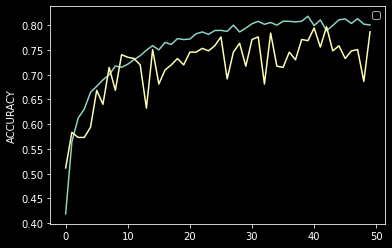

In [145]:
plt.plot(ANN_Model.history["accuracy"])
plt.plot(ANN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

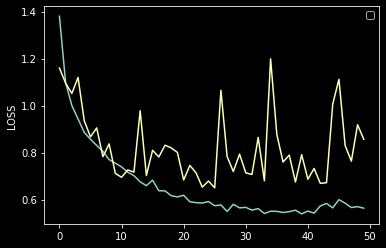

In [146]:
plt.plot(ANN_Model.history["loss"])
plt.plot(ANN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

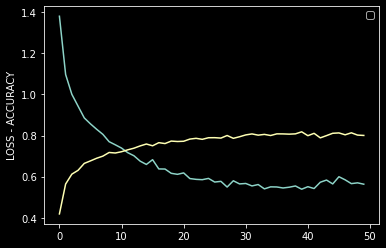

In [147]:
plt.plot(ANN_Model.history["loss"])
plt.plot(ANN_Model.history["accuracy"])
plt.ylabel("LOSS - ACCURACY")
plt.legend()
plt.show()

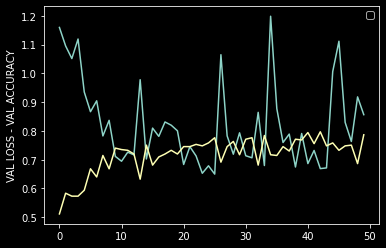

In [148]:
plt.plot(ANN_Model.history["val_loss"])
plt.plot(ANN_Model.history["val_accuracy"])
plt.ylabel("VAL LOSS - VAL ACCURACY")
plt.legend()
plt.show()

<AxesSubplot:>

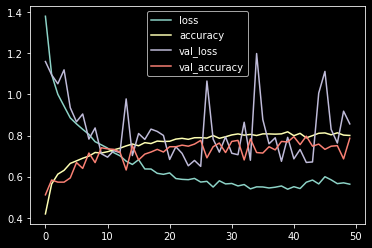

In [149]:
Dict_Summary = pd.DataFrame(ANN_Model.history)
Dict_Summary.plot()

# LEARNING IN EACH LAYER

#### ANY TARGET IMAGE

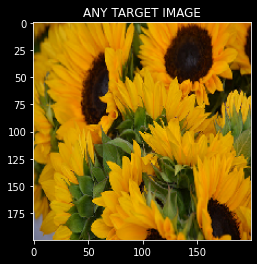

In [150]:
Any_IMG = Train_Data["JPG"][6]
IMG = image.load_img(Any_IMG,target_size=(200,200))
Array_IMG = image.img_to_array(IMG)
Array_IMG = np.expand_dims(Array_IMG,axis=0)
Array_IMG /= 255

plt.imshow(Array_IMG[0])
plt.title("ANY TARGET IMAGE")
plt.show()

In [151]:
layer_out = [layer.output for layer in Model.layers[:8]]
activation_model = models.Model(inputs=Model.input,outputs=layer_out)
activations = activation_model.predict(Array_IMG)

In [152]:
first_layer_act = activations[0]
print(first_layer_act.shape)

(1, 198, 198, 12)


#### LAYERS VISUALIZE PICTURES

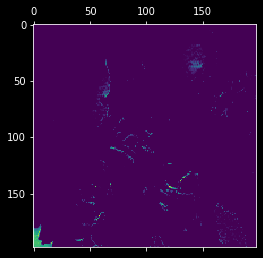

In [153]:
plt.matshow(first_layer_act[0,:,:,4],cmap="viridis")

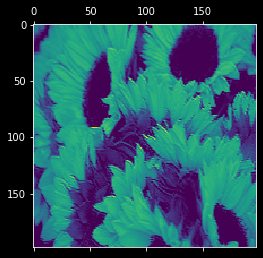

In [154]:
plt.matshow(first_layer_act[0,:,:,7],cmap="viridis")

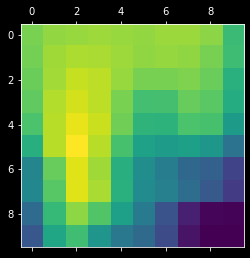

In [155]:
plt.matshow(first_layer_act[0,:10,:10,7],cmap="viridis")

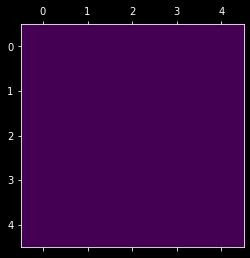

In [156]:
plt.matshow(first_layer_act[0,:5,:5,8],cmap="viridis")

# PREDICTION

In [157]:
Prediction = Model.predict(Test_IMG_Set)
Prediction = Prediction.argmax(axis=-1)

In [158]:
print(Prediction)

[1 1 1 1 3 0 3 3 4 2 2 2 2 0 3 3 4 4 4 3 4 3 1 4 1 1 1 1 1 1 1 1 0 1 1 0 4
 4 3 3 1 1 4 3 1 4 1 0 4 3 1 2 2 3 4 3 3 1 2 3 4 2 3 0 0 3 3 4 3 4 2 2 0 2
 3 4 3 0 4 1 0 3 0 0 2 0 4 3 3 4 2 1 1 2 0 3 3 1 4 1 3 1 4 0 4 4 3 4 2 3 1
 3 2 3 3 1 3 1 4 1 4 3 1 1 4 0 3 1 2 1 0 1 2 4 4 0 3 4 0 0 1 3 2 2 2 2 2 0
 1 4 3 1 2 3 2 2 4 1 3 4 0 2 0 0 4 3 1 2 3 0 3 0 1 3 1 1 4 0 4 4 2 4 4 1 3
 1 4 2 2 4 2 1 1 3 4 4 1 2 0 2 4 2 4 3 4 2 4 4 2 1 1 4 3 4 1 4 4 3 2 3 0 4
 4 2 1 1 1 2 0 3 4 2 1 1 0 4 4 1 1 4 4 1 3 4 0 3 4 0 1 1 3 1 2 0 4 1 1 0 1
 4 2 4 4 4 1 4 0 3 0 4 2 0 2 3 3 1 2 0 4 2 0 4 0 2 4 3 4 0 1 0 3 0 4 2 4 1
 3 4 2 3 0 4 2 2 4 4 1 3 4 3 4 3 3 1 2 4 3 0 3 3 3 2 4 1 2 1 4 2 4 4 3 1 3
 1 3 0 1 1 3 1 4 4 4 4 3 3 3 1 4 1 1 3 2 2 4 2 3 4 3 3 1 1 4 4 4 3 2 1 4 4
 1 0 1 1 3 4 3 4 3 3 0 1 4 0 0 2 4 4 1 1 2 3 0 3 1 0 2 1 3 0 1 4 1 4 4 4 4
 3 4 3 1 4 1 4 1 0 4 0 2 1 2 0 4 4 1 1 1 1 3 2 1 3 0]


* 'daisy': 0
* 'dandelion': 1
* 'rose': 2
* 'sunflower': 3
* 'tulip': 4

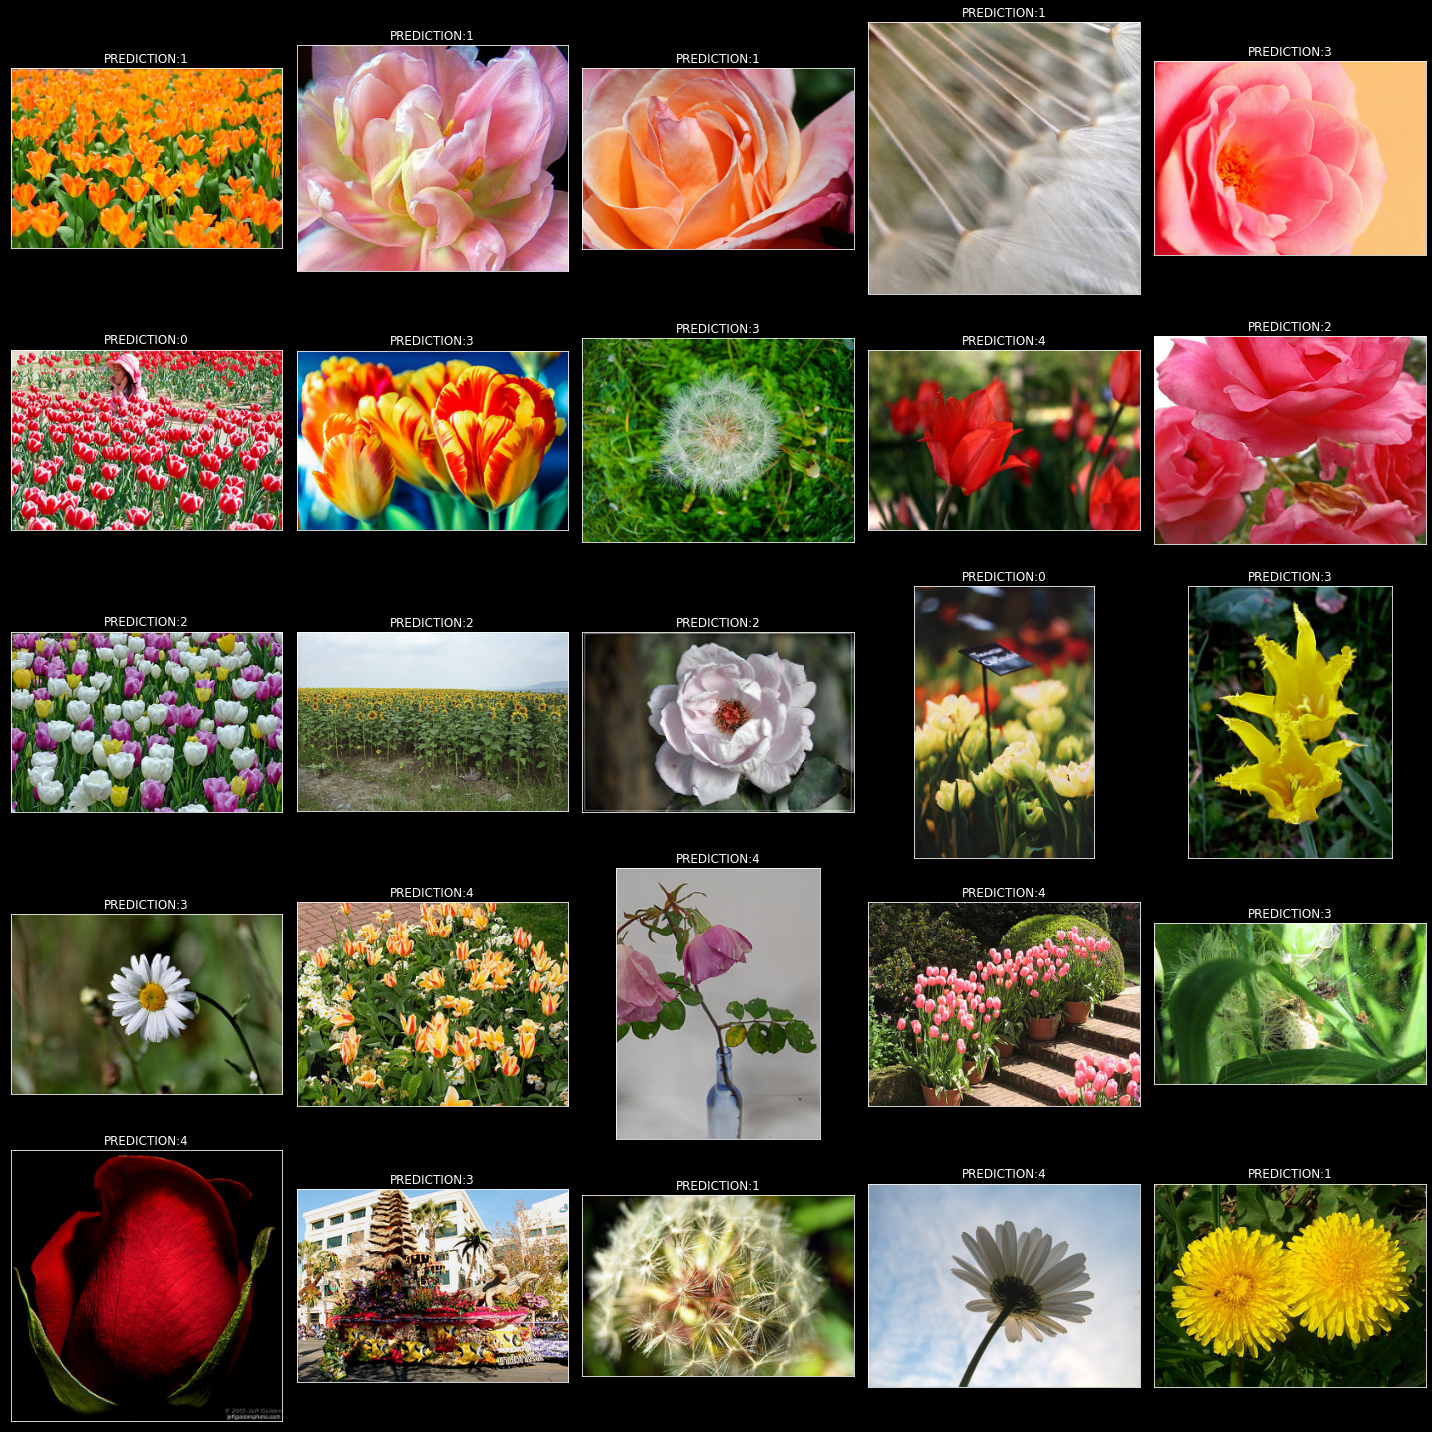

In [159]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Test_Data["JPG"].iloc[i]))
    ax.set_title(f"PREDICTION:{Prediction[i]}")
plt.tight_layout()
plt.show()

In [262]:
Model_RCNN = Sequential()

Model_RCNN.add(Conv2D(12,(3,3),activation="relu",
                 input_shape=(200,200,3)))
Model_RCNN.add(BatchNormalization())
Model_RCNN.add(MaxPooling2D((2,2)))

#
Model_RCNN.add(Conv2D(24,(3,3),
                 activation="relu",padding="same"))
Model_RCNN.add(BatchNormalization())
Model_RCNN.add(MaxPooling2D((2,2)))

#
Model_RCNN.add(Conv2D(64,(3,3),
                 activation="relu",padding="same"))
Model_RCNN.add(BatchNormalization())
Model_RCNN.add(MaxPooling2D((2,2)))

#
Model_RCNN.add(Conv2D(128,(2,2),
                 activation="relu",padding="same"))
Model_RCNN.add(BatchNormalization())
Model_RCNN.add(MaxPooling2D((2,2)))

#
Model_RCNN.add(TimeDistributed(Flatten()))
Model_RCNN.add(Bidirectional(LSTM(32,
                                  return_sequences=True,
                                  dropout=0.5,
                                  recurrent_dropout=0.5)))

#
Model_RCNN.add(Flatten())
Model_RCNN.add(Dense(512,activation="relu"))
Model_RCNN.add(Dropout(0.5))
Model_RCNN.add(Dense(5,activation="softmax"))

In [263]:
Model_RCNN.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [264]:
RCNN_Model = Model_RCNN.fit(Train_IMG_Set,
                      validation_data=Validation_IMG_Set,
                      epochs=50)

Epoch 1/50
110/110 [==============================] - 57s 484ms/step - loss: 1.3929 - accuracy: 0.4066 - val_loss: 2.8502 - val_accuracy: 0.2674
Epoch 2/50
110/110 [==============================] - 51s 467ms/step - loss: 1.0595 - accuracy: 0.5813 - val_loss: 3.9613 - val_accuracy: 0.2699
Epoch 3/50
110/110 [==============================] - 52s 470ms/step - loss: 0.9702 - accuracy: 0.6077 - val_loss: 2.1610 - val_accuracy: 0.3111
Epoch 4/50
110/110 [==============================] - 52s 469ms/step - loss: 0.8864 - accuracy: 0.6471 - val_loss: 2.0104 - val_accuracy: 0.4319
Epoch 5/50
110/110 [==============================] - 52s 469ms/step - loss: 0.8848 - accuracy: 0.6518 - val_loss: 1.0087 - val_accuracy: 0.5450
Epoch 6/50
110/110 [==============================] - 51s 468ms/step - loss: 0.8026 - accuracy: 0.6907 - val_loss: 1.0673 - val_accuracy: 0.6247
Epoch 7/50
110/110 [==============================] - 51s 467ms/step - loss: 0.7997 - accuracy: 0.6837 - val_loss: 0.9201 - val_ac

In [265]:
Model_Results_RCNN = Model_RCNN.evaluate(Test_IMG_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results_RCNN[0])
print("ACCURACY:  " + "%.2f" % Model_Results_RCNN[1])

LOSS:  0.6833
ACCURACY:  0.79


In [266]:
print(Model_RCNN.summary())

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 198, 198, 12)      336       
_________________________________________________________________
batch_normalization_21 (Batc (None, 198, 198, 12)      48        
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 99, 99, 12)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 99, 99, 24)        2616      
_________________________________________________________________
batch_normalization_22 (Batc (None, 99, 99, 24)        96        
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 49, 49, 24)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 49, 49, 64)      

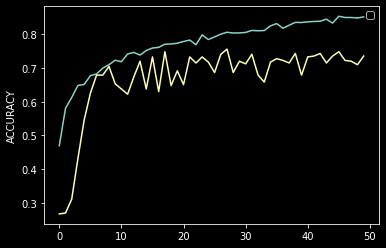

In [267]:
plt.plot(RCNN_Model.history["accuracy"])
plt.plot(RCNN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

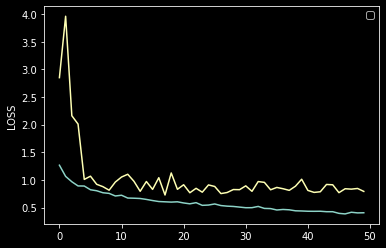

In [268]:
plt.plot(RCNN_Model.history["loss"])
plt.plot(RCNN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

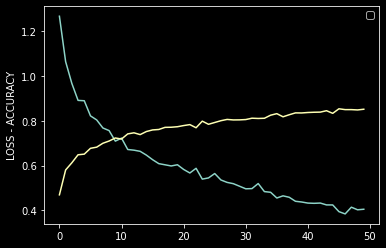

In [269]:
plt.plot(RCNN_Model.history["loss"])
plt.plot(RCNN_Model.history["accuracy"])
plt.ylabel("LOSS - ACCURACY")
plt.legend()
plt.show()

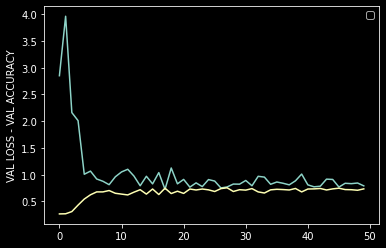

In [270]:
plt.plot(RCNN_Model.history["val_loss"])
plt.plot(RCNN_Model.history["val_accuracy"])
plt.ylabel("VAL LOSS - VAL ACCURACY")
plt.legend()
plt.show()

<AxesSubplot:>

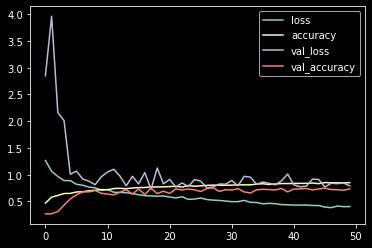

In [271]:
Dict_Summary_CRNN = pd.DataFrame(RCNN_Model.history)
Dict_Summary_CRNN.plot()